---
title: "Named-entity recognition"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-03-24"
categories: [python, datacamp, machine learning, nlp]
image: "namedEntityRecognition.png"

---

# Named-entity recognition

Throughout this chapter, you will learn how to use pre-trained models on English and non-English texts to identify who, what, and where in your texts. This course introduces a slightly more advanced topic: named entity recognition. You will also learn how to use two new libraries to enhance your Natural Language Processing toolkit, polyglot and spaCy.

This **Named-entity recognition** is part of [Datacamp course: Introduction to Natural Language Processing in Python] You will learn the basics of natural language processing (NLP), such as how to identify and separate words, how to extract topics from a text, and how to construct your own fake news classifier. As part of this course, you will also learn how to use basic libraries such as NLTK as well as libraries that utilize deep learning to solve common NLP problems. The purpose of this course is to provide you with the foundation for processing and parsing text as you progress through your Python learning journey.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to Natural Language Processing in Python]: (https://app.datacamp.com/learn/courses/introduction-to-natural-language-processing-in-python)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dghr201\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\dghr201\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dghr201\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

# Named Entity Recognition

    Named Entity Recognition (NER)
        NLP task to identify important named entities in the text
            People, places, organizations
            Dates, states, works of art
        Can be used alongside topic identification
        Who? What? When? Where?


In [4]:
with open('dataset/News articles/uber_apple.txt', 'r',encoding="utf-8") as file:
    article = file.read()

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == 'NE':
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


## Charting practice

In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

In [7]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

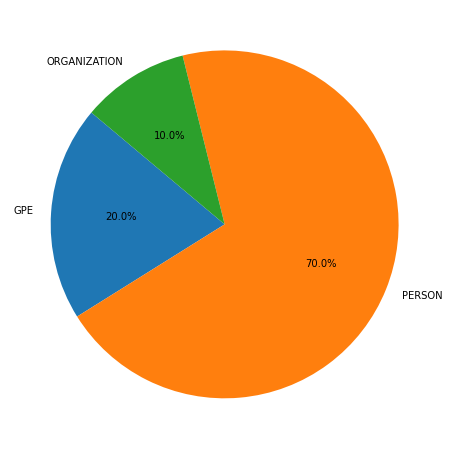

In [8]:
from collections import defaultdict


# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1

# Create a list from the dictionary keys for the cart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
fig = plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140);

# Introduction to SpaCy

    SpaCy
        NLP library similar to gensim, with different implementations
        Focuson creating NLP pipelines to generate models and corpora
        Open source, with extra libraries and tools
            Displacy
    Why use SpaCy for NER?
        Easy pipeline creation
        Different entity types compared to nltk
        Informal language corpora
            Easily find entities in Tweets and chat messages


## Comparing NLTK with spaCy NER

In [14]:
!spacy download en_core_web_sm

#for mac use following
#bash python -m spacy download en_core_web_sm

2023-03-29 11:30:54.899847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-03-29 11:30:54.899900: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-29 11:31:01.396641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-03-29 11:31:01.396675: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-29 11:31:01.406497: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DHR0201L
2023-03-29 11:31:01.406729: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DHR0201L
You should consider upgrading via the 'C:\Users\dghr201\AppData\Local\Programs\Python\Python39\python.exe -m pip install


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


ORG Apple
PERSON Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber
LOC Silicon Valley’s
NORP democratic
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


# Multilingual NER with polyglot

polyglot

    NLP library which uses word vectors
    vectors for many different languages (more than 130)


## French NER with polyglot I

In [25]:
!pip install pyicu
!pip install pycld2
!pip install morfessor
!polyglot download ner2.fr
!polyglot download embeddings2.fr

  Using cached PyICU-2.10.2.tar.gz (255 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached PyICU-2.10.1.tar.gz (255 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached PyICU-2.10.tar.gz (255 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached PyICU-2.9.tar.gz (305 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to bui

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\dghr201\AppData\Local\Programs\Python\Python39\python.exe' 'C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' get_requires_for_build_wheel 'C:\Users\dghr201\AppData\Local\Temp\tmp69rum_ge'
       cwd: C:\Users\dghr201\AppData\Local\Temp\pip-install-4u4h_9bt\pyicu_4f3bfc205a874daebe5ade04a040de3d
  Complete output (58 lines):
  (running 'icu-config --version')
  (running 'pkg-config --modversion icu-i18n')
  Traceback (most recent call last):
    File "<string>", line 89, in <module>
    File "C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\os.py", line 679, in __getitem__
      raise KeyError(key) from None
  KeyError: 'ICU_VERSION'
  
  During handling of the above exception, another exception occurred:
  
  Traceback (most recent call last):
    File "<string>", line 92, in <module>
    File "<string>", line 19, in check_output
    F

  Using cached pycld2-0.41.tar.gz (41.4 MB)
  Running setup.py clean for pycld2
Failed to build pycld2
    Running setup.py install for pycld2: started
    Running setup.py install for pycld2: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\dghr201\AppData\Local\Programs\Python\Python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\dghr201\\AppData\\Local\\Temp\\pip-install-atpmrhxy\\pycld2_ac6694dc5fd9476b9a04559776a20c7d\\setup.py'"'"'; __file__='"'"'C:\\Users\\dghr201\\AppData\\Local\\Temp\\pip-install-atpmrhxy\\pycld2_ac6694dc5fd9476b9a04559776a20c7d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\dghr201\AppData\Local\Temp\pip-wheel-z148lwik'
       cwd: C:\Users\dghr201\AppData\Local\Temp\pip-install-atpmrhxy\pycld2_ac6694dc5fd9476b9a04559776a20c7d\
  Complete output (39 lines):
  running bdist_wheel
  The [wheel] section is deprecated. Use [bdist_wheel] i

You should consider upgrading via the 'C:\Users\dghr201\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
'polyglot' is not recognized as an internal or external command,
operable program or batch file.
'polyglot' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
!pip install polyglot.text

ERROR: Could not find a version that satisfies the requirement polyglot.text (from versions: none)
ERROR: No matching distribution found for polyglot.text
You should consider upgrading via the 'C:\Users\dghr201\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [18]:
with open('dataset/News articles/french.txt', 'r',encoding="utf-8") as file:
    article = file.read()

In [21]:
!pip install polyglot

  Using cached polyglot-16.7.4.tar.gz (126 kB)
  Using cached polyglot-15.10.03-py2.py3-none-any.whl (54 kB)
  Using cached pycld2-0.41.tar.gz (41.4 MB)
  Using cached PyICU-2.10.2.tar.gz (255 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached PyICU-2.10.1.tar.gz (255 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached PyICU-2.10.tar.gz (255 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached PyICU-2.9.tar.gz (305 kB)
  Installing build depend

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\dghr201\AppData\Local\Programs\Python\Python39\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\dghr201\\AppData\\Local\\Temp\\pip-install-jr0jivqd\\polyglot_23176ed948524228a2191c4883a7f415\\setup.py'"'"'; __file__='"'"'C:\\Users\\dghr201\\AppData\\Local\\Temp\\pip-install-jr0jivqd\\polyglot_23176ed948524228a2191c4883a7f415\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\dghr201\AppData\Local\Temp\pip-pip-egg-info-_dy5waxt'
         cwd: C:\Users\dghr201\AppData\Local\Temp\pip-install-jr0jivqd\polyglot_23176ed948524228a2191c4883a7f415\
    Complete output (7 lines):
    Traceback (most recent call last):
      File "<stri

In [28]:
from polyglot.text import Text
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)

# Print the type of ent
print(type(ent))


ModuleNotFoundError: No module named 'polyglot'

## French NER with polyglot II

In [ ]:
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

## Spanish NER with polyglot

Your specific task is to determine how many of the entities contain the words "Márquez" or "Gabo" - these refer to the same person in different ways!

In [22]:
!polyglot download ner2.es embeddings2.es

'polyglot' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
with open('dataset/News articles/spanish.txt', 'r',encoding="utf-8") as file:
    article = file.read()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/News articles/spanish.txt'

In [ ]:
txt = Text(article)

# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # check whether the entity contains 'Márquez' or 'Gabo'
    if ('Márquez' in ent) or ('Gabo' in ent):
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)